# 캐글 산탄데르 고객 만족 예측

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [16]:
cust_df = pd.read_csv("train.csv", encoding='latin-1')
print('dataset shape :', cust_df.shape)
print(cust_df.info())
cust_df.head()

dataset shape : (76020, 371)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [18]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [19]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

print('피처데이터 shape :{0}'.format(X_features.shape))

피처데이터 shape :(76020, 369)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                   test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape :{0}, 테스트 세트 Shape :{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape :(60816, 369), 테스트 세트 Shape :(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [33]:
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8415


In [34]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100,random_state=156, learning_rate=0.02, max_depth=7,
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
           eval_metric="auc", eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')

print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.925762	validation_1-auc:0.90521
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.925767	validation_1-auc:0.905227
[2]	validation_0-auc:0.92722	validation_1-auc:0.908611
[3]	validation_0-auc:0.92715	validation_1-auc:0.908517
[4]	validation_0-auc:0.927149	validation_1-auc:0.908515
[5]	validation_0-auc:0.927148	validation_1-auc:0.908515
[6]	validation_0-auc:0.927147	validation_1-auc:0.908512
[7]	validation_0-auc:0.927148	validation_1-auc:0.908514
[8]	validation_0-auc:0.927149	validation_1-auc:0.908513
[9]	validation_0-auc:0.927147	validation_1-auc:0.90851
[10]	validation_0-auc:0.927104	validation_1-auc:0.90843
[11]	validation_0-auc:0.927105	validation_1-auc:0.908432
[12]	validation_0-auc:0.927105	validation_1-auc:0.908434
[13]	validation_0-auc:0.927104	validation_1-auc:0.908432
[14]	validation_0-auc:0.927105	validation_1-auc:0.908433
[1

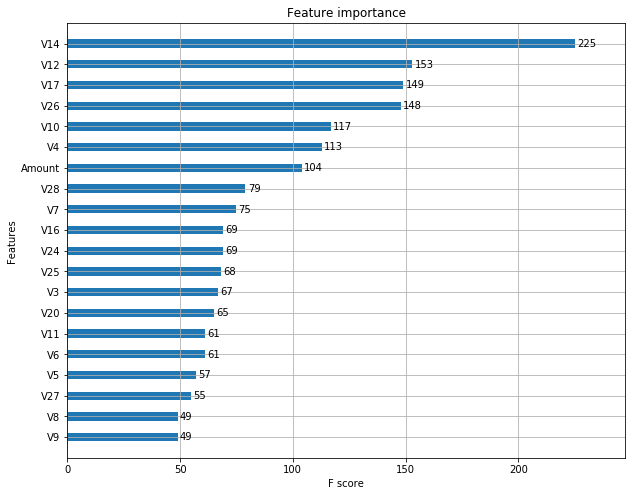

In [35]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [36]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
             eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average="macro")

print("ROC AUC :{0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.897513	valid_0's binary_logloss: 0.013034
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.165207	valid_0's binary_logloss: 0.0483534
[3]	valid_0's auc: 0.898353	valid_0's binary_logloss: 0.0133665
[4]	valid_0's auc: 0.891639	valid_0's binary_logloss: 0.0138914
[5]	valid_0's auc: 0.883588	valid_0's binary_logloss: 0.015971
[6]	valid_0's auc: 0.863885	valid_0's binary_logloss: 0.0179046
[7]	valid_0's auc: 0.857634	valid_0's binary_logloss: 0.0176702
[8]	valid_0's auc: 0.850866	valid_0's binary_logloss: 0.0191915
[9]	valid_0's auc: 0.850882	valid_0's binary_logloss: 0.0178513
[10]	valid_0's auc: 0.838916	valid_0's binary_logloss: 0.0174067
[11]	valid_0's auc: 0.839346	valid_0's binary_logloss: 0.017304
[12]	valid_0's auc: 0.83348	valid_0's binary_logloss: 0.0179936
[13]	valid_0's auc: 0.845264	valid_0's binary_logloss: 0.0174576
[14]	valid_0's auc: 0.862688	valid_0's binary_logloss: 0.018984
[15]	valid_0's auc: 0.823132	valid_0's bin

In [37]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params={'num_leaves':[32, 64],
       'max_depth':[128, 160],
       'min_child_samples':[60,100],
       'subsample':[0.8, 1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC :{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.969819	valid_0's binary_logloss: 0.0135072	valid_1's auc: 0.892913	valid_1's binary_logloss: 0.0148751
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.977291	valid_0's binary_logloss: 0.0106205	valid_1's auc: 0.925534	valid_1's binary_logloss: 0.012047
[3]	valid_0's auc: 0.583473	valid_0's binary_logloss: 0.0260383	valid_1's auc: 0.623108	valid_1's binary_logloss: 0.0236274
[4]	valid_0's auc: 0.804758	valid_0's binary_logloss: 0.0242994	valid_1's auc: 0.812625	valid_1's binary_logloss: 0.0266343
[5]	valid_0's auc: 0.796111	valid_0's binary_logloss: 0.0204856	valid_1's auc: 0.765602	valid_1's binary_logloss: 0.0247685
[6]	valid_0's auc: 0.789004	valid_0's binary_logloss: 0.019863	valid_1's auc: 0.754704	valid_1's binary_logloss: 0.0241886
[7]	valid_0's auc: 0.793391	valid_0's binary_logloss: 0.0196478	valid_1's auc: 0.750247	valid_1's binary_logloss: 0.0241578
[8]	valid_0's auc: 0.796424	valid_0's binary_logloss: 0.0201013	valid_1's

[1]	valid_0's auc: 0.964337	valid_0's binary_logloss: 0.0132878	valid_1's auc: 0.897712	valid_1's binary_logloss: 0.0145044
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.169623	valid_0's binary_logloss: 0.0508007	valid_1's auc: 0.17896	valid_1's binary_logloss: 0.0479197
[3]	valid_0's auc: 0.970683	valid_0's binary_logloss: 0.0212088	valid_1's auc: 0.894171	valid_1's binary_logloss: 0.0218299
[4]	valid_0's auc: 0.971676	valid_0's binary_logloss: 0.020949	valid_1's auc: 0.902141	valid_1's binary_logloss: 0.0216355
[5]	valid_0's auc: 0.980256	valid_0's binary_logloss: 0.020715	valid_1's auc: 0.939031	valid_1's binary_logloss: 0.0214863
[6]	valid_0's auc: 0.663606	valid_0's binary_logloss: 0.0320808	valid_1's auc: 0.607695	valid_1's binary_logloss: 0.0334744
[7]	valid_0's auc: 0.828952	valid_0's binary_logloss: 0.0267071	valid_1's auc: 0.755507	valid_1's binary_logloss: 0.0302812
[8]	valid_0's auc: 0.973851	valid_0's binary_logloss: 0.0214267	valid_1's 

[1]	valid_0's auc: 0.959064	valid_0's binary_logloss: 0.0127704	valid_1's auc: 0.902672	valid_1's binary_logloss: 0.01509
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.607291	valid_0's binary_logloss: 0.0216719	valid_1's auc: 0.577639	valid_1's binary_logloss: 0.0233185
[3]	valid_0's auc: 0.956177	valid_0's binary_logloss: 0.0112955	valid_1's auc: 0.893761	valid_1's binary_logloss: 0.0143819
[4]	valid_0's auc: 0.947832	valid_0's binary_logloss: 0.0108506	valid_1's auc: 0.90039	valid_1's binary_logloss: 0.0143336
[5]	valid_0's auc: 0.836129	valid_0's binary_logloss: 0.015928	valid_1's auc: 0.794132	valid_1's binary_logloss: 0.0189782
[6]	valid_0's auc: 0.84161	valid_0's binary_logloss: 0.0217302	valid_1's auc: 0.793319	valid_1's binary_logloss: 0.0224536
[7]	valid_0's auc: 0.831243	valid_0's binary_logloss: 0.0195073	valid_1's auc: 0.770861	valid_1's binary_logloss: 0.0211038
[8]	valid_0's auc: 0.822961	valid_0's binary_logloss: 0.0218715	valid_1's au

[5]	valid_0's auc: 0.786056	valid_0's binary_logloss: 0.019971	valid_1's auc: 0.703301	valid_1's binary_logloss: 0.0244228
[6]	valid_0's auc: 0.858583	valid_0's binary_logloss: 0.0170784	valid_1's auc: 0.73042	valid_1's binary_logloss: 0.0235802
[7]	valid_0's auc: 0.858481	valid_0's binary_logloss: 0.0166513	valid_1's auc: 0.735308	valid_1's binary_logloss: 0.0232352
[8]	valid_0's auc: 0.861202	valid_0's binary_logloss: 0.0161961	valid_1's auc: 0.738074	valid_1's binary_logloss: 0.0231662
[9]	valid_0's auc: 0.887479	valid_0's binary_logloss: 0.014919	valid_1's auc: 0.757771	valid_1's binary_logloss: 0.0233414
[10]	valid_0's auc: 0.883572	valid_0's binary_logloss: 0.0152291	valid_1's auc: 0.76779	valid_1's binary_logloss: 0.0244309
[11]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.021197	valid_1's auc: 0.762202	valid_1's binary_logloss: 0.0296506
[12]	valid_0's auc: 0.874433	valid_0's binary_logloss: 0.0157574	valid_1's auc: 0.741809	valid_1's binary_logloss: 0.0250416
[13]	valid

[8]	valid_0's auc: 0.973682	valid_0's binary_logloss: 0.0211532	valid_1's auc: 0.910134	valid_1's binary_logloss: 0.0232633
[9]	valid_0's auc: 0.40731	valid_0's binary_logloss: 0.041207	valid_1's auc: 0.376454	valid_1's binary_logloss: 0.0418471
[10]	valid_0's auc: 0.976056	valid_0's binary_logloss: 0.0293127	valid_1's auc: 0.91059	valid_1's binary_logloss: 0.0267824
[11]	valid_0's auc: 0.973247	valid_0's binary_logloss: 0.0288252	valid_1's auc: 0.911291	valid_1's binary_logloss: 0.0266962
[12]	valid_0's auc: 0.385617	valid_0's binary_logloss: 0.0381169	valid_1's auc: 0.361441	valid_1's binary_logloss: 0.0382731
[13]	valid_0's auc: 0.969334	valid_0's binary_logloss: 0.0288492	valid_1's auc: 0.913401	valid_1's binary_logloss: 0.0265421
[14]	valid_0's auc: 0.923119	valid_0's binary_logloss: 0.0194948	valid_1's auc: 0.866543	valid_1's binary_logloss: 0.0201212
[15]	valid_0's auc: 0.838987	valid_0's binary_logloss: 0.023539	valid_1's auc: 0.771059	valid_1's binary_logloss: 0.0239947
[16]	v

[9]	valid_0's auc: 0.935514	valid_0's binary_logloss: 0.00841179	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.0164794
[10]	valid_0's auc: 0.935602	valid_0's binary_logloss: 0.00825102	valid_1's auc: 0.838491	valid_1's binary_logloss: 0.0163809
[11]	valid_0's auc: 0.781599	valid_0's binary_logloss: 0.0142852	valid_1's auc: 0.695911	valid_1's binary_logloss: 0.0211951
[12]	valid_0's auc: 0.951464	valid_0's binary_logloss: 0.00974531	valid_1's auc: 0.83766	valid_1's binary_logloss: 0.016632
[13]	valid_0's auc: 0.949593	valid_0's binary_logloss: 0.0090644	valid_1's auc: 0.841347	valid_1's binary_logloss: 0.0161451
[14]	valid_0's auc: 0.949207	valid_0's binary_logloss: 0.0085635	valid_1's auc: 0.841442	valid_1's binary_logloss: 0.0160556
[15]	valid_0's auc: 0.789657	valid_0's binary_logloss: 0.0138014	valid_1's auc: 0.700002	valid_1's binary_logloss: 0.0208083
[16]	valid_0's auc: 0.949092	valid_0's binary_logloss: 0.0105504	valid_1's auc: 0.837685	valid_1's binary_logloss: 0.0179437
[

[11]	valid_0's auc: 0.969872	valid_0's binary_logloss: 0.0127894	valid_1's auc: 0.934725	valid_1's binary_logloss: 0.0176783
[12]	valid_0's auc: 0.958198	valid_0's binary_logloss: 0.0128411	valid_1's auc: 0.9202	valid_1's binary_logloss: 0.0179528
[13]	valid_0's auc: 0.937839	valid_0's binary_logloss: 0.0129826	valid_1's auc: 0.900016	valid_1's binary_logloss: 0.0181702
[14]	valid_0's auc: 0.79561	valid_0's binary_logloss: 0.022297	valid_1's auc: 0.756519	valid_1's binary_logloss: 0.0289606
[15]	valid_0's auc: 0.79962	valid_0's binary_logloss: 0.0191835	valid_1's auc: 0.753784	valid_1's binary_logloss: 0.0250649
[16]	valid_0's auc: 0.971904	valid_0's binary_logloss: 0.063014	valid_1's auc: 0.913403	valid_1's binary_logloss: 0.0782521
[17]	valid_0's auc: 0.969112	valid_0's binary_logloss: 0.0624406	valid_1's auc: 0.916459	valid_1's binary_logloss: 0.0771845
[18]	valid_0's auc: 0.544132	valid_0's binary_logloss: 0.0293254	valid_1's auc: 0.540845	valid_1's binary_logloss: 0.0308401
[19]	v

[11]	valid_0's auc: 0.689195	valid_0's binary_logloss: 0.0240356	valid_1's auc: 0.714695	valid_1's binary_logloss: 0.0273402
[12]	valid_0's auc: 0.854534	valid_0's binary_logloss: 0.033765	valid_1's auc: 0.867367	valid_1's binary_logloss: 0.0351051
[13]	valid_0's auc: 0.649049	valid_0's binary_logloss: 0.0272559	valid_1's auc: 0.630872	valid_1's binary_logloss: 0.0338757
[14]	valid_0's auc: 0.64966	valid_0's binary_logloss: 0.0285141	valid_1's auc: 0.636231	valid_1's binary_logloss: 0.0338938
[15]	valid_0's auc: 0.820112	valid_0's binary_logloss: 0.0364842	valid_1's auc: 0.80986	valid_1's binary_logloss: 0.0362345
[16]	valid_0's auc: 0.665249	valid_0's binary_logloss: 0.0238206	valid_1's auc: 0.66477	valid_1's binary_logloss: 0.0265758
[17]	valid_0's auc: 0.672848	valid_0's binary_logloss: 0.0249901	valid_1's auc: 0.670771	valid_1's binary_logloss: 0.0287267
[18]	valid_0's auc: 0.677065	valid_0's binary_logloss: 0.031097	valid_1's auc: 0.677071	valid_1's binary_logloss: 0.0318292
[19]	

[12]	valid_0's auc: 0.843886	valid_0's binary_logloss: 0.016112	valid_1's auc: 0.741825	valid_1's binary_logloss: 0.0236687
[13]	valid_0's auc: 0.843228	valid_0's binary_logloss: 0.0175179	valid_1's auc: 0.732629	valid_1's binary_logloss: 0.0252598
[14]	valid_0's auc: 0.843195	valid_0's binary_logloss: 0.0172379	valid_1's auc: 0.731802	valid_1's binary_logloss: 0.0260795
[15]	valid_0's auc: 0.842807	valid_0's binary_logloss: 0.036214	valid_1's auc: 0.744962	valid_1's binary_logloss: 0.0452031
[16]	valid_0's auc: 0.555079	valid_0's binary_logloss: 0.0314369	valid_1's auc: 0.46879	valid_1's binary_logloss: 0.038306
[17]	valid_0's auc: 0.480957	valid_0's binary_logloss: 0.035409	valid_1's auc: 0.426932	valid_1's binary_logloss: 0.0410539
[18]	valid_0's auc: 0.527874	valid_0's binary_logloss: 0.0331697	valid_1's auc: 0.498731	valid_1's binary_logloss: 0.0363804
[19]	valid_0's auc: 0.83834	valid_0's binary_logloss: 0.0477498	valid_1's auc: 0.806838	valid_1's binary_logloss: 0.0519452
[20]	v

[15]	valid_0's auc: 0.791619	valid_0's binary_logloss: 0.0152045	valid_1's auc: 0.740466	valid_1's binary_logloss: 0.0220735
[16]	valid_0's auc: 0.957303	valid_0's binary_logloss: 0.0196235	valid_1's auc: 0.882291	valid_1's binary_logloss: 0.0271163
[17]	valid_0's auc: 0.791908	valid_0's binary_logloss: 0.0156161	valid_1's auc: 0.740712	valid_1's binary_logloss: 0.0216181
[18]	valid_0's auc: 0.951462	valid_0's binary_logloss: 0.0159673	valid_1's auc: 0.875771	valid_1's binary_logloss: 0.0224027
[19]	valid_0's auc: 0.791859	valid_0's binary_logloss: 0.0150133	valid_1's auc: 0.740909	valid_1's binary_logloss: 0.021569
[20]	valid_0's auc: 0.792454	valid_0's binary_logloss: 0.0246914	valid_1's auc: 0.74558	valid_1's binary_logloss: 0.0316559
[21]	valid_0's auc: 0.902204	valid_0's binary_logloss: 0.00940309	valid_1's auc: 0.827222	valid_1's binary_logloss: 0.0171129
[22]	valid_0's auc: 0.979884	valid_0's binary_logloss: 0.0115906	valid_1's auc: 0.914285	valid_1's binary_logloss: 0.0188945
[

[17]	valid_0's auc: 0.780494	valid_0's binary_logloss: 0.0363437	valid_1's auc: 0.718455	valid_1's binary_logloss: 0.0429481
[18]	valid_0's auc: 0.551539	valid_0's binary_logloss: 0.0364439	valid_1's auc: 0.499811	valid_1's binary_logloss: 0.036085
[19]	valid_0's auc: 0.965613	valid_0's binary_logloss: 0.0233561	valid_1's auc: 0.880802	valid_1's binary_logloss: 0.024913
[20]	valid_0's auc: 0.966089	valid_0's binary_logloss: 0.0198984	valid_1's auc: 0.881537	valid_1's binary_logloss: 0.0228663
[21]	valid_0's auc: 0.966058	valid_0's binary_logloss: 0.0191453	valid_1's auc: 0.890589	valid_1's binary_logloss: 0.0225752
[22]	valid_0's auc: 0.969074	valid_0's binary_logloss: 0.0189662	valid_1's auc: 0.892312	valid_1's binary_logloss: 0.022939
[23]	valid_0's auc: 0.844416	valid_0's binary_logloss: 0.0239963	valid_1's auc: 0.808372	valid_1's binary_logloss: 0.024886
[24]	valid_0's auc: 0.844329	valid_0's binary_logloss: 0.0243227	valid_1's auc: 0.8098	valid_1's binary_logloss: 0.0253347
[25]	v

[20]	valid_0's auc: 0.733607	valid_0's binary_logloss: 0.0518544	valid_1's auc: 0.661292	valid_1's binary_logloss: 0.0633305
[21]	valid_0's auc: 0.733654	valid_0's binary_logloss: 0.0413531	valid_1's auc: 0.655349	valid_1's binary_logloss: 0.0558813
[22]	valid_0's auc: 0.730937	valid_0's binary_logloss: 0.0427978	valid_1's auc: 0.654204	valid_1's binary_logloss: 0.0573587
[23]	valid_0's auc: 0.740269	valid_0's binary_logloss: 0.0311018	valid_1's auc: 0.685444	valid_1's binary_logloss: 0.0442292
[24]	valid_0's auc: 0.771719	valid_0's binary_logloss: 0.0538876	valid_1's auc: 0.703271	valid_1's binary_logloss: 0.0660856
[25]	valid_0's auc: 0.735995	valid_0's binary_logloss: 0.0307997	valid_1's auc: 0.669975	valid_1's binary_logloss: 0.0435707
[26]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.0390979	valid_1's auc: 0.74458	valid_1's binary_logloss: 0.054187
[27]	valid_0's auc: 0.842104	valid_0's binary_logloss: 0.0259812	valid_1's auc: 0.752233	valid_1's binary_logloss: 0.0392292
[28]

[21]	valid_0's auc: 0.595527	valid_0's binary_logloss: 0.0268796	valid_1's auc: 0.59752	valid_1's binary_logloss: 0.0279099
[22]	valid_0's auc: 0.711461	valid_0's binary_logloss: 0.0268513	valid_1's auc: 0.690797	valid_1's binary_logloss: 0.0298967
[23]	valid_0's auc: 0.713812	valid_0's binary_logloss: 0.0267681	valid_1's auc: 0.689626	valid_1's binary_logloss: 0.0291422
[24]	valid_0's auc: 0.77201	valid_0's binary_logloss: 0.0329456	valid_1's auc: 0.721581	valid_1's binary_logloss: 0.036221
[25]	valid_0's auc: 0.766562	valid_0's binary_logloss: 0.033005	valid_1's auc: 0.728907	valid_1's binary_logloss: 0.0357001
[26]	valid_0's auc: 0.777883	valid_0's binary_logloss: 0.0334064	valid_1's auc: 0.728478	valid_1's binary_logloss: 0.0363673
[27]	valid_0's auc: 0.780837	valid_0's binary_logloss: 0.0353876	valid_1's auc: 0.734342	valid_1's binary_logloss: 0.0384409
[28]	valid_0's auc: 0.847466	valid_0's binary_logloss: 0.0386178	valid_1's auc: 0.781651	valid_1's binary_logloss: 0.0394612
[29]

[22]	valid_0's auc: 0.893466	valid_0's binary_logloss: 0.0389757	valid_1's auc: 0.858242	valid_1's binary_logloss: 0.0431584
[23]	valid_0's auc: 0.763415	valid_0's binary_logloss: 0.0317431	valid_1's auc: 0.731404	valid_1's binary_logloss: 0.0382483
[24]	valid_0's auc: 0.772444	valid_0's binary_logloss: 0.0331851	valid_1's auc: 0.738516	valid_1's binary_logloss: 0.0386274
[25]	valid_0's auc: 0.905878	valid_0's binary_logloss: 0.050335	valid_1's auc: 0.866267	valid_1's binary_logloss: 0.0525562
[26]	valid_0's auc: 0.739831	valid_0's binary_logloss: 0.032599	valid_1's auc: 0.716203	valid_1's binary_logloss: 0.036418
[27]	valid_0's auc: 0.643298	valid_0's binary_logloss: 0.0353013	valid_1's auc: 0.60241	valid_1's binary_logloss: 0.0379747
[28]	valid_0's auc: 0.897096	valid_0's binary_logloss: 0.0322749	valid_1's auc: 0.865424	valid_1's binary_logloss: 0.0358909
[29]	valid_0's auc: 0.894949	valid_0's binary_logloss: 0.0313432	valid_1's auc: 0.865214	valid_1's binary_logloss: 0.0347959
[30]

[23]	valid_0's auc: 0.932769	valid_0's binary_logloss: 0.0212061	valid_1's auc: 0.832647	valid_1's binary_logloss: 0.0336107
[24]	valid_0's auc: 0.846426	valid_0's binary_logloss: 0.0183819	valid_1's auc: 0.778416	valid_1's binary_logloss: 0.0293901
[25]	valid_0's auc: 0.93602	valid_0's binary_logloss: 0.0286294	valid_1's auc: 0.827541	valid_1's binary_logloss: 0.0438792
[26]	valid_0's auc: 0.838688	valid_0's binary_logloss: 0.0194064	valid_1's auc: 0.758986	valid_1's binary_logloss: 0.0291925
[27]	valid_0's auc: 0.908721	valid_0's binary_logloss: 0.0249083	valid_1's auc: 0.799222	valid_1's binary_logloss: 0.0360996
[28]	valid_0's auc: 0.787664	valid_0's binary_logloss: 0.0230927	valid_1's auc: 0.720405	valid_1's binary_logloss: 0.0319635
[29]	valid_0's auc: 0.836307	valid_0's binary_logloss: 0.0534437	valid_1's auc: 0.74142	valid_1's binary_logloss: 0.0660736
[30]	valid_0's auc: 0.834188	valid_0's binary_logloss: 0.0242619	valid_1's auc: 0.742592	valid_1's binary_logloss: 0.0360792
[3

[24]	valid_0's auc: 0.851104	valid_0's binary_logloss: 0.0195312	valid_1's auc: 0.762585	valid_1's binary_logloss: 0.0238518
[25]	valid_0's auc: 0.911195	valid_0's binary_logloss: 0.017823	valid_1's auc: 0.811158	valid_1's binary_logloss: 0.026539
[26]	valid_0's auc: 0.720146	valid_0's binary_logloss: 0.0223203	valid_1's auc: 0.669161	valid_1's binary_logloss: 0.0255047
[27]	valid_0's auc: 0.856012	valid_0's binary_logloss: 0.0180061	valid_1's auc: 0.776957	valid_1's binary_logloss: 0.0237921
[28]	valid_0's auc: 0.896109	valid_0's binary_logloss: 0.0154463	valid_1's auc: 0.814986	valid_1's binary_logloss: 0.0212746
[29]	valid_0's auc: 0.774232	valid_0's binary_logloss: 0.0185315	valid_1's auc: 0.706387	valid_1's binary_logloss: 0.0236306
[30]	valid_0's auc: 0.884418	valid_0's binary_logloss: 0.0135951	valid_1's auc: 0.824477	valid_1's binary_logloss: 0.0187522
[31]	valid_0's auc: 0.715778	valid_0's binary_logloss: 0.0406596	valid_1's auc: 0.630037	valid_1's binary_logloss: 0.0459967
Ea

[27]	valid_0's auc: 0.878311	valid_0's binary_logloss: 0.0379008	valid_1's auc: 0.750067	valid_1's binary_logloss: 0.0515976
[28]	valid_0's auc: 0.880492	valid_0's binary_logloss: 0.0350658	valid_1's auc: 0.749685	valid_1's binary_logloss: 0.0482641
[29]	valid_0's auc: 0.849541	valid_0's binary_logloss: 0.0354669	valid_1's auc: 0.740001	valid_1's binary_logloss: 0.0493402
[30]	valid_0's auc: 0.847371	valid_0's binary_logloss: 0.050075	valid_1's auc: 0.742737	valid_1's binary_logloss: 0.0620661
[31]	valid_0's auc: 0.875785	valid_0's binary_logloss: 0.0391229	valid_1's auc: 0.750564	valid_1's binary_logloss: 0.0563523
Early stopping, best iteration is:
[1]	valid_0's auc: 0.981565	valid_0's binary_logloss: 0.0132233	valid_1's auc: 0.920338	valid_1's binary_logloss: 0.0145133
[1]	valid_0's auc: 0.977233	valid_0's binary_logloss: 0.0134652	valid_1's auc: 0.91372	valid_1's binary_logloss: 0.0148811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.96783	valid_

[28]	valid_0's auc: 0.911087	valid_0's binary_logloss: 0.00689726	valid_1's auc: 0.777283	valid_1's binary_logloss: 0.0176441
[29]	valid_0's auc: 0.911185	valid_0's binary_logloss: 0.00802916	valid_1's auc: 0.772458	valid_1's binary_logloss: 0.0180137
[30]	valid_0's auc: 0.914053	valid_0's binary_logloss: 0.0115931	valid_1's auc: 0.772577	valid_1's binary_logloss: 0.0231989
[31]	valid_0's auc: 0.905729	valid_0's binary_logloss: 0.0135442	valid_1's auc: 0.772658	valid_1's binary_logloss: 0.025193
Early stopping, best iteration is:
[1]	valid_0's auc: 0.974429	valid_0's binary_logloss: 0.0127393	valid_1's auc: 0.927643	valid_1's binary_logloss: 0.0150973
[1]	valid_0's auc: 0.981565	valid_0's binary_logloss: 0.0132233	valid_1's auc: 0.920338	valid_1's binary_logloss: 0.0145133
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.183079	valid_0's binary_logloss: 0.0506916	valid_1's auc: 0.174976	valid_1's binary_logloss: 0.0479338
[3]	valid_0's auc: 0.974673	val

[29]	valid_0's auc: 0.878067	valid_0's binary_logloss: 0.0207868	valid_1's auc: 0.831836	valid_1's binary_logloss: 0.0273473
[30]	valid_0's auc: 0.891815	valid_0's binary_logloss: 0.0568528	valid_1's auc: 0.864337	valid_1's binary_logloss: 0.0628918
[31]	valid_0's auc: 0.826418	valid_0's binary_logloss: 0.0282052	valid_1's auc: 0.811374	valid_1's binary_logloss: 0.033788
[32]	valid_0's auc: 0.742413	valid_0's binary_logloss: 0.0416953	valid_1's auc: 0.757019	valid_1's binary_logloss: 0.0529943
Early stopping, best iteration is:
[2]	valid_0's auc: 0.980903	valid_0's binary_logloss: 0.0115386	valid_1's auc: 0.924048	valid_1's binary_logloss: 0.0135886
[1]	valid_0's auc: 0.961167	valid_0's binary_logloss: 0.0114277	valid_1's auc: 0.876521	valid_1's binary_logloss: 0.0139677
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.956719	valid_0's binary_logloss: 0.0101289	valid_1's auc: 0.891586	valid_1's binary_logloss: 0.0129466
[3]	valid_0's auc: 0.956455	valid

[29]	valid_0's auc: 0.792175	valid_0's binary_logloss: 0.0518736	valid_1's auc: 0.773873	valid_1's binary_logloss: 0.0645682
[30]	valid_0's auc: 0.803694	valid_0's binary_logloss: 0.0639284	valid_1's auc: 0.779376	valid_1's binary_logloss: 0.0788115
[31]	valid_0's auc: 0.784874	valid_0's binary_logloss: 0.0336922	valid_1's auc: 0.78666	valid_1's binary_logloss: 0.0418743
Early stopping, best iteration is:
[1]	valid_0's auc: 0.970148	valid_0's binary_logloss: 0.0112098	valid_1's auc: 0.922921	valid_1's binary_logloss: 0.0119357
[1]	valid_0's auc: 0.971612	valid_0's binary_logloss: 0.0130854	valid_1's auc: 0.899218	valid_1's binary_logloss: 0.0145802
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.980903	valid_0's binary_logloss: 0.0115386	valid_1's auc: 0.924048	valid_1's binary_logloss: 0.0135886
[3]	valid_0's auc: 0.817133	valid_0's binary_logloss: 0.0172561	valid_1's auc: 0.770589	valid_1's binary_logloss: 0.0204834
[4]	valid_0's auc: 0.796363	valid_

[30]	valid_0's auc: 0.765976	valid_0's binary_logloss: 0.0388433	valid_1's auc: 0.695908	valid_1's binary_logloss: 0.052017
[31]	valid_0's auc: 0.768946	valid_0's binary_logloss: 0.0540415	valid_1's auc: 0.696086	valid_1's binary_logloss: 0.0688987
Early stopping, best iteration is:
[1]	valid_0's auc: 0.961167	valid_0's binary_logloss: 0.0114277	valid_1's auc: 0.876521	valid_1's binary_logloss: 0.0139677
[1]	valid_0's auc: 0.970148	valid_0's binary_logloss: 0.0112098	valid_1's auc: 0.922921	valid_1's binary_logloss: 0.0119357
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.57144	valid_0's binary_logloss: 0.0296765	valid_1's auc: 0.572681	valid_1's binary_logloss: 0.0264699
[3]	valid_0's auc: 0.87435	valid_0's binary_logloss: 0.0199373	valid_1's auc: 0.823531	valid_1's binary_logloss: 0.0230381
[4]	valid_0's auc: 0.874065	valid_0's binary_logloss: 0.0196162	valid_1's auc: 0.832721	valid_1's binary_logloss: 0.0228477
[5]	valid_0's auc: 0.69479	valid_0's 

[1]	valid_0's auc: 0.972596	valid_0's binary_logloss: 0.0114203	valid_1's auc: 0.913637	valid_1's binary_logloss: 0.0139685
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.963783	valid_0's binary_logloss: 0.0101077	valid_1's auc: 0.885467	valid_1's binary_logloss: 0.0129495
[3]	valid_0's auc: 0.966538	valid_0's binary_logloss: 0.00885929	valid_1's auc: 0.895924	valid_1's binary_logloss: 0.0118512
[4]	valid_0's auc: 0.540231	valid_0's binary_logloss: 0.0311602	valid_1's auc: 0.477665	valid_1's binary_logloss: 0.0321776
[5]	valid_0's auc: 0.537082	valid_0's binary_logloss: 0.0419507	valid_1's auc: 0.482689	valid_1's binary_logloss: 0.0431315
[6]	valid_0's auc: 0.53706	valid_0's binary_logloss: 0.0330521	valid_1's auc: 0.475486	valid_1's binary_logloss: 0.0338424
[7]	valid_0's auc: 0.891797	valid_0's binary_logloss: 0.0159197	valid_1's auc: 0.798081	valid_1's binary_logloss: 0.0189427
[8]	valid_0's auc: 0.89356	valid_0's binary_logloss: 0.0158961	valid_1'

[5]	valid_0's auc: 0.619135	valid_0's binary_logloss: 0.0332026	valid_1's auc: 0.586084	valid_1's binary_logloss: 0.0366007
[6]	valid_0's auc: 0.618933	valid_0's binary_logloss: 0.0258433	valid_1's auc: 0.585809	valid_1's binary_logloss: 0.0278438
[7]	valid_0's auc: 0.620894	valid_0's binary_logloss: 0.025671	valid_1's auc: 0.600223	valid_1's binary_logloss: 0.027513
[8]	valid_0's auc: 0.792973	valid_0's binary_logloss: 0.0256302	valid_1's auc: 0.72509	valid_1's binary_logloss: 0.0302297
[9]	valid_0's auc: 0.793244	valid_0's binary_logloss: 0.0258594	valid_1's auc: 0.736222	valid_1's binary_logloss: 0.0308041
[10]	valid_0's auc: 0.952951	valid_0's binary_logloss: 0.0121485	valid_1's auc: 0.871242	valid_1's binary_logloss: 0.021776
[11]	valid_0's auc: 0.881897	valid_0's binary_logloss: 0.0154061	valid_1's auc: 0.823716	valid_1's binary_logloss: 0.0238075
[12]	valid_0's auc: 0.950359	valid_0's binary_logloss: 0.0161397	valid_1's auc: 0.876473	valid_1's binary_logloss: 0.0269041
[13]	vali

[7]	valid_0's auc: 0.864742	valid_0's binary_logloss: 0.0311312	valid_1's auc: 0.8089	valid_1's binary_logloss: 0.0329494
[8]	valid_0's auc: 0.700277	valid_0's binary_logloss: 0.0236219	valid_1's auc: 0.662025	valid_1's binary_logloss: 0.0274668
[9]	valid_0's auc: 0.699553	valid_0's binary_logloss: 0.0371687	valid_1's auc: 0.674421	valid_1's binary_logloss: 0.0380406
[10]	valid_0's auc: 0.855991	valid_0's binary_logloss: 0.0334398	valid_1's auc: 0.813434	valid_1's binary_logloss: 0.0346436
[11]	valid_0's auc: 0.690697	valid_0's binary_logloss: 0.0252563	valid_1's auc: 0.657992	valid_1's binary_logloss: 0.0276937
[12]	valid_0's auc: 0.856522	valid_0's binary_logloss: 0.0341037	valid_1's auc: 0.816893	valid_1's binary_logloss: 0.0354529
[13]	valid_0's auc: 0.673872	valid_0's binary_logloss: 0.0257702	valid_1's auc: 0.633527	valid_1's binary_logloss: 0.0315797
[14]	valid_0's auc: 0.674463	valid_0's binary_logloss: 0.0275916	valid_1's auc: 0.637666	valid_1's binary_logloss: 0.0323409
[15]	

In [27]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                         max_depth=128)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
             eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average="macro")

print("ROC AUC :{0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

# Kaggle 신용카드 사기 검출

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
print(card_df.info())
card_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis = 1, inplace = True)
    return df_copy

In [40]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [41]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [43]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216, F1: 0.7273, AUC: 0.9582


In [44]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [45]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1: 0.8421, AUC: 0.9797


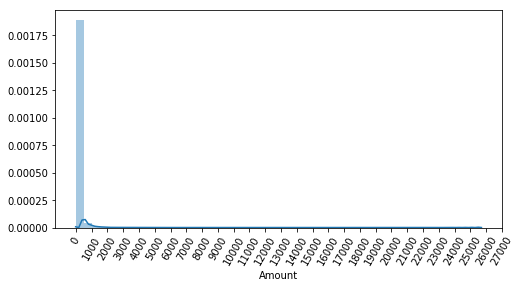

In [46]:
import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.distplot(card_df['Amount'])

In [47]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy

In [48]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC: 0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568, F1: 0.8421, AUC: 0.9773


In [49]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy

In [50]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC: 0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC: 0.9786


### 이상치 데이터 제거 후 모델 학습/예측/평가

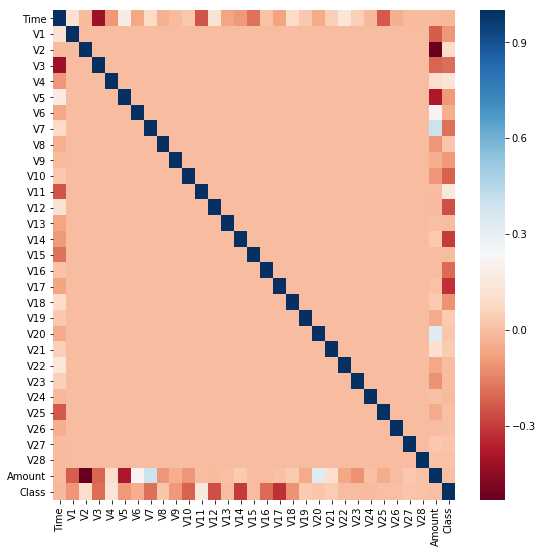

In [52]:
import seaborn as sns

plt.figure(figsize = (9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [51]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [53]:
outlier_index = get_outlier(df=card_df, column = 'V14', weight = 1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [54]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    outlier_index = get_outlier(df=card_df, column = 'V14', weight = 1.5)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    return df_copy


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC: 0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85291     4]
 [   25   121]]
정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288, F1: 0.8930, AUC: 0.9831


### SMOTE 오버 샘플링 적용 후

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

ImportError: cannot import name '_n_jobs_docstring' from 'imblearn.utils._docstring' (C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_docstring.py)

In [ ]:
lr_clf = LogisticRegression()

get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)